In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import data, filters, morphology
!pip install stackview
import stackview
from stackview import imshow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.1 MB/s eta 0:00:00


In [2]:
image1 = np.zeros((5,5))
image1[2,2] = 1
image1

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

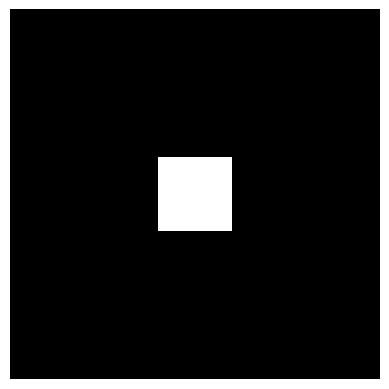

In [3]:
imshow(image1)

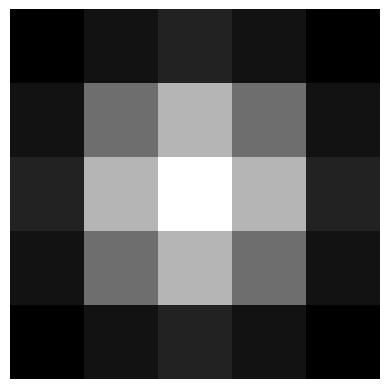

In [4]:
blurred = filters.gaussian(image1, sigma=1)
imshow(blurred)

In [5]:
image3 = imread("https://github.com/haesleinhuepf/BioImageAnalysisNotebooks/raw/main/data/mitosis_mod.tif")

In [6]:
stackview.interact(filters.gaussian, image3, zoom_factor=4)

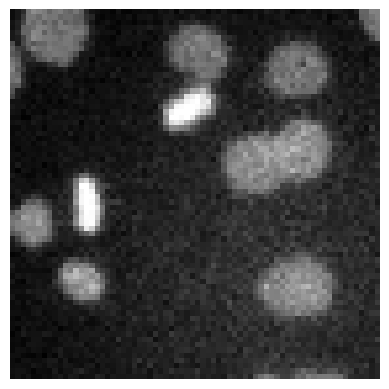

In [8]:
stackview.imshow(image3)

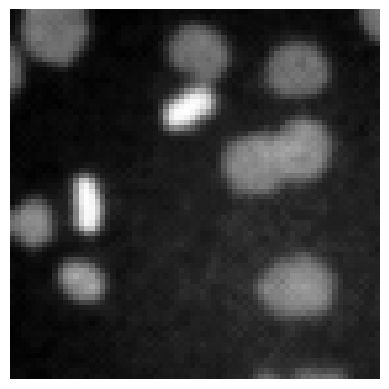

In [7]:
denoised_mean = filters.rank.mean(image3.astype(np.uint8), morphology.disk(1))
imshow(denoised_mean)

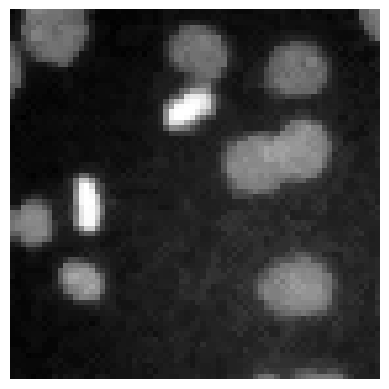

In [9]:
denoised_median = filters.rank.median(image3, morphology.disk(1))
imshow(denoised_median)

In [10]:
def custom_median(image, radius:int):
  return filters.median(image, morphology.disk(radius))
stackview.interact(custom_median, image3, zoom_factor=4)

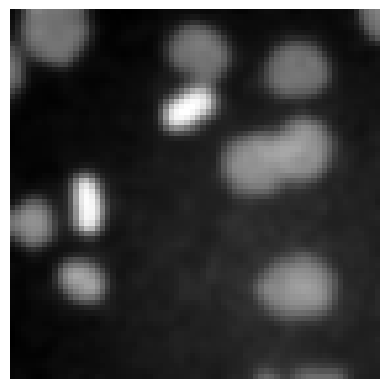

In [11]:
denoised_gaussian = filters.gaussian(image3, sigma=1)
imshow(denoised_gaussian)

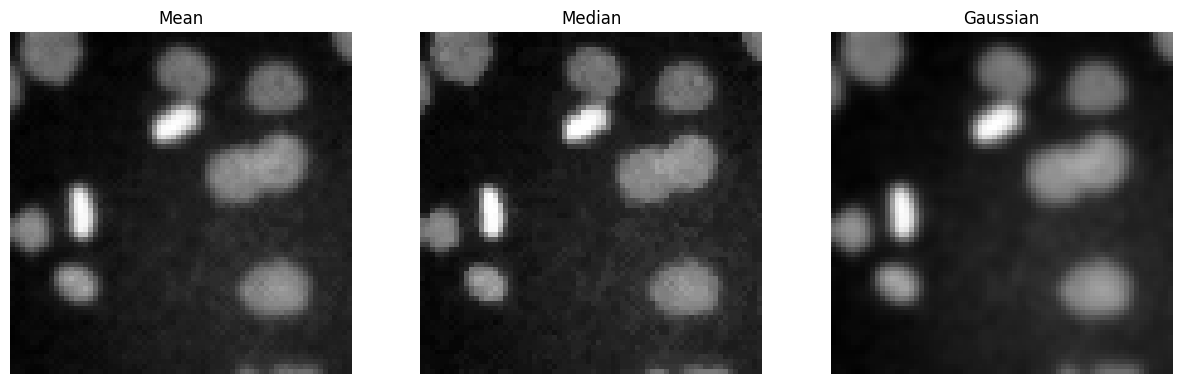

In [14]:
fig, axes = plt.subplots(1,3, figsize=(15, 15))
stackview.imshow(denoised_mean, plot=axes[0], title="Mean")
stackview.imshow(denoised_median, plot=axes[1], title="Median")
stackview.imshow(denoised_gaussian, plot=axes[2], title="Gaussian")

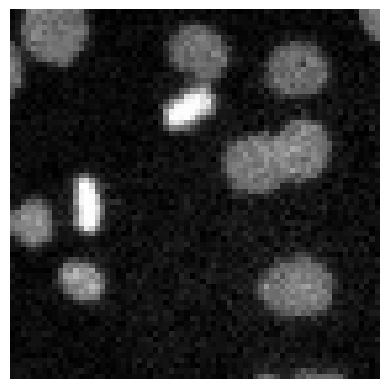

In [15]:
top_hat = morphology.white_tophat(image3, morphology.disk(15))
imshow(top_hat)